# Importing libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# to make sure graphs a displayed in the notebook
%matplotlib inline

# Imporing data

In [4]:
path=r"C:\Users\Sam\Desktop\CF\Project 6 WORLD BANK\datasets\SPI excluded outliers 6.3.csv"
data=pd.read_csv(os.path.join(path))

In [5]:
# checking for execution
data.head(1)

,Country,Date,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Income,Region,Population,Score Category
0,Finland,2022,100.0,96.433333,88.4875,83.258333,100.0,93.635833,High income,Europe & Central Asia,5556106.0,High Score


In [6]:
data.shape

(1496, 12)

# Elbow technique

In [33]:
# creating the suitable set
data_to_use=data[["SPI Score","Population","Data Infrastructure"]]

In [34]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [35]:
score = [kmeans[i].fit(data_to_use).score(data_to_use) for i in range(len(kmeans))]

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

In [36]:
score

[-3.0217574785030574e+18,
 -9.232441523671676e+17,
 -4.1073334068943014e+17,
 -2.1754638706164598e+17,
 -1.4039856078178765e+17,
 -9.715625842290971e+16,
 -6.876916945787546e+16,
 -5.06594825921769e+16,
 -3.851095631635296e+16]

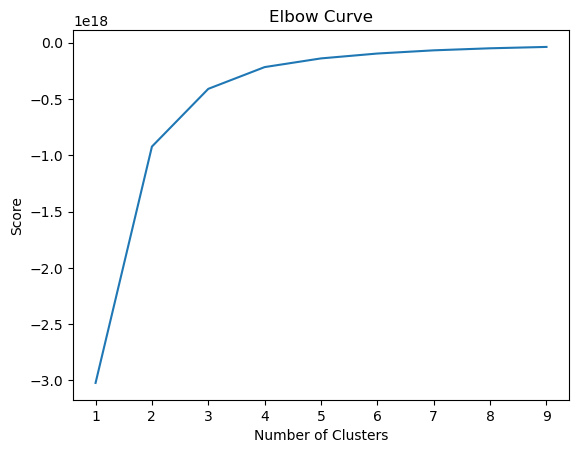

In [37]:
# Plotting the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel("Number of Clusters")
pl.ylabel("Score")
pl.title("Elbow Curve")
pl.show()

## The optimal number of clusters seems to be 3 as the cure it flatteing after that.

# K-means clustering

In [39]:
#creating a k-means object
kmeans=KMeans(n_clusters=3)
#fitting the object
kmeans.fit(data_to_use)

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [40]:
# creating "clusters" column
data_to_use["clusters"]=kmeans.fit_predict(data_to_use)

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sam\AppData\Local\Temp\ipykernel_21052\3828163406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_use["clusters"]=kmeans.fit_predict(data_to_use)


In [41]:
# checking for execution
data_to_use.head(1)

,SPI Score,Population,Data Infrastructure,clusters
0,93.635833,5556106.0,100.0,0


In [42]:
# checking value counts
data_to_use["clusters"].value_counts()

clusters
0    1271
2     183
1      42
Name: count, dtype: int64

### vast majority of point are centered around cluster 0. I wonder if creating 4 clusters will change the picture.

In [43]:
# creating a k-means object with 4 clusters to see the difference in distribution
kmeans4=KMeans(n_clusters=4)
#fitting the object
kmeans4.fit(data_to_use)

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [44]:
data_to_use["clusters4"]=kmeans4.fit_predict(data_to_use)

C:\Users\Sam\anaconda3\envs\folium_project\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sam\AppData\Local\Temp\ipykernel_21052\735088887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_use["clusters4"]=kmeans4.fit_predict(data_to_use)


In [45]:
# checking for execution
data_to_use.head(1)

,SPI Score,Population,Data Infrastructure,clusters,clusters4
0,93.635833,5556106.0,100.0,0,2


In [46]:
# getting valuer counts for 4 clusters
data_to_use["clusters4"].value_counts()

clusters4
2    1116
0     261
3      84
1      35
Name: count, dtype: int64

### the distribution did not change much, so sticking to a k-mean with 3 clusters is the best way to go.

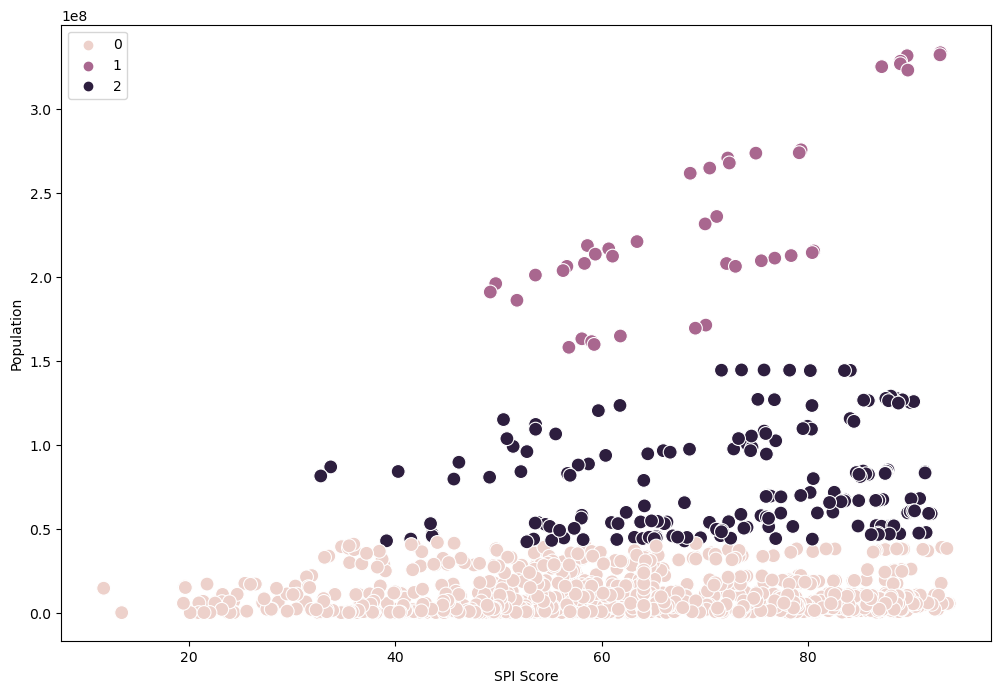

In [47]:
# Plotting the clusters for the "Population" and "SPI Score" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_to_use["SPI Score"],y=data_to_use["Population"], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel("SPI Score") 
plt.ylabel("Population")
plt.show()

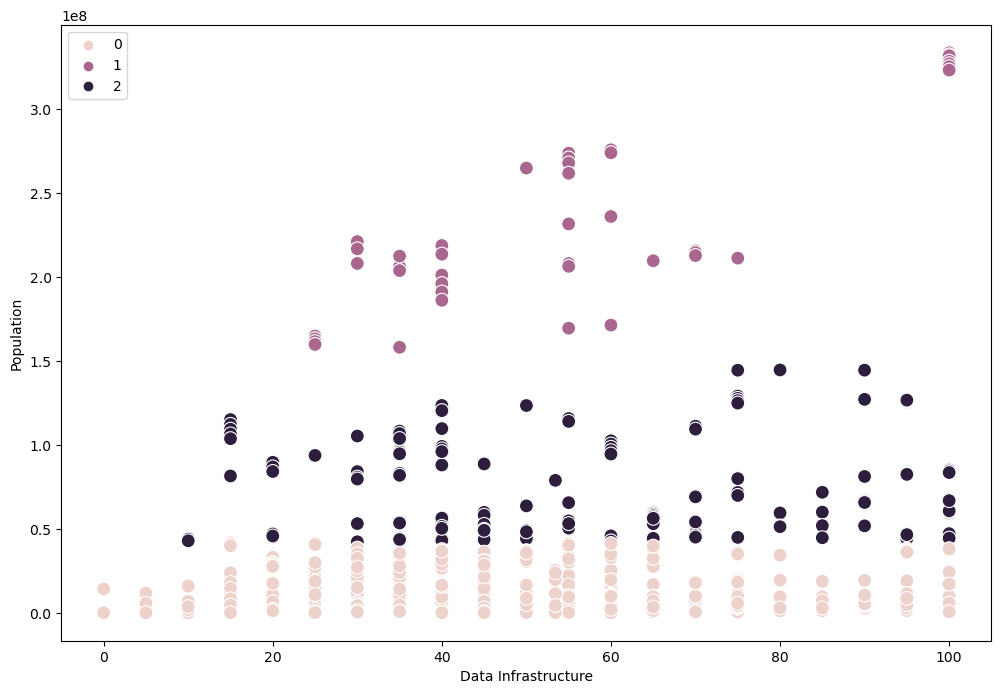

In [50]:
# Plotting the clusters for the "Population" and "Data Infrastructure" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data_to_use["Data Infrastructure"],y=data_to_use["Population"], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel("Data Infrastructure") 
plt.ylabel("Population")
plt.show()

In [51]:
data_to_use.loc[data_to_use["clusters"]== 2,"cluster"]="dark purple"
data_to_use.loc[data_to_use["clusters"]== 1,"cluster"]="purple"
data_to_use.loc[data_to_use["clusters"]== 0,"cluster"]="pink"

C:\Users\Sam\AppData\Local\Temp\ipykernel_21052\1890909643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_use.loc[data_to_use["clusters"]== 2,"cluster"]="dark purple"


In [52]:
# grouping by
data_to_use.groupby("cluster").agg({"Population":["mean","median"], 
                         "Data Infrastructure":["mean","median"], 
                          "SPI Score":["mean","median"]})

Population              Data Infrastructure         SPI Score  \
                     mean       median                mean median       mean   
cluster                                                                        
dark purple  7.551662e+07   66965912.0           64.772842  65.00  73.012559   
pink         8.459003e+06    4479219.0           51.715838  53.43  62.587339   
purple       2.321693e+08  213863773.0           55.952381  55.00  69.927480   

                        
                median  
cluster                 
dark purple  75.713333  
pink         64.070000  
purple       70.264375

### Populations mean for dark purple is 75,516,620, for pink is 8,459,003, and for purple is 232,169,300. The mean  and median for SPI score seems to be higher than mean and median for data infrastructure score. Since data infrastrucure is one of the pillars that SPI score is calculated upon, this can mean countires received overall lower scores for data infrastructure that other pillars contributing to the final SPI score. Further analysis needs to be done.